# Teste Prático: Engenheiro de dados Jr.
![Logo Rox Partner](./assets/roxpartner_logo.png)

### Etapa de preprocessamento

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.catch_warnings()

def preprocess_verification(df: pd.DataFrame, df_name: str) -> pd.DataFrame:
    """
    Realiza uma verificação preliminar de um DataFrame, incluindo a exibição das primeiras linhas, 
    a verificação de valores nulos e a contagem de registros duplicados.

    Parameters:
    df (pd.DataFrame): O DataFrame a ser verificado.
    df_name (str): O nome do DataFrame para exibição nas mensagens de saída.

    Returns:
    pd.DataFrame: O DataFrame original passado como parâmetro.
    """
    # Exibir as primeiras linhas do DataFrame
    print(f"Primeiras linhas do DataFrame {df_name}:")
    print(df.head(3))

    # Verificar valores nulos
    print(f"\nVerificação de valores nulos no DataFrame {df_name}:")
    print(df.isnull().sum())

    # Verificar registros duplicados
    print(f"\nVerificação de registros duplicados no DataFrame {df_name}:")
    print(df.duplicated().sum())
    
    print('')

    return df

In [6]:
# Carregar o arquivo CSV
sales_data = pd.read_excel('./data/sales_data.xlsx')
preprocess_verification(sales_data,'Vendas')

Primeiras linhas do DataFrame Vendas:
   order_id product_name  quantity  unit_price  cliente_id order_date
0         1    Produto A         3          25          74 2024-03-01
1         2    Produto B         2          30          36 2024-03-02
2         3    Produto C         1          20          12 2024-03-03

Verificação de valores nulos no DataFrame Vendas:
order_id        0
product_name    0
quantity        0
unit_price      0
cliente_id      0
order_date      0
dtype: int64

Verificação de registros duplicados no DataFrame Vendas:
0



,order_id,product_name,quantity,unit_price,cliente_id,order_date
0,1,Produto A,3,25,74,2024-03-01
1,2,Produto B,2,30,36,2024-03-02
2,3,Produto C,1,20,12,2024-03-03
3,4,Produto A,4,25,92,2024-03-04
4,5,Produto D,2,40,55,2024-03-05
...,...,...,...,...,...,...
95,96,Produto C,2,20,29,2024-06-04
96,97,Produto D,3,40,76,2024-06-05
97,98,Produto A,1,25,97,2024-06-06
98,99,Produto B,2,30,50,2024-06-07


In [7]:
customer_data = pd.read_excel('./data/customer_data.xlsx')
preprocess_verification(customer_data,'Clientes')

Primeiras linhas do DataFrame Clientes:
   id_cliente    nome sobrenome                   email        telefone  \
0           1    João     Silva    joao.silva@email.com  (11) 1234-5678   
1           2   Maria    Santos  maria.santos@email.com  (11) 2345-6789   
2           3  Carlos     Rocha  carlos.rocha@email.com  (11) 3456-7890   

               endereço  numero  
0        Rua das Flores     123  
1     Avenida Principal     456  
2  Travessa das Árvores     789  

Verificação de valores nulos no DataFrame Clientes:
id_cliente    0
nome          0
sobrenome     0
email         0
telefone      0
endereço      0
numero        0
dtype: int64

Verificação de registros duplicados no DataFrame Clientes:
0



,id_cliente,nome,sobrenome,email,telefone,endereço,numero
0,1,João,Silva,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123
1,2,Maria,Santos,maria.santos@email.com,(11) 2345-6789,Avenida Principal,456
2,3,Carlos,Rocha,carlos.rocha@email.com,(11) 3456-7890,Travessa das Árvores,789
3,4,Ana,Costa,ana.costa@email.com,(11) 4567-8901,Rua dos Passarinhos,987
4,5,Luiz,Oliveira,luiz.oliveira@email.com,(11) 5678-9012,Alameda das Rosas,654
...,...,...,...,...,...,...,...
95,96,Mateus,Almeida,mateus.almeida@email.com,(11) 6789-0123,Quadra 11,321
96,97,Larissa,Gonçalves,larissa.goncalves@email.com,(11) 7890-1234,Praça dos Jardins,987
97,98,Andre,Silva,andre.silva@email.com,(11) 8901-2345,Rua dos Manacás,654
98,99,Vanessa,Rocha,vanessa.rocha@email.com,(11) 9012-3456,Avenida dos Jasmins,321


In [8]:
# precisamos renomear a coluna id_cliente na tabela customer_data para que possamos realizar a junção futuramente
customer_data = customer_data.rename(columns={'id_cliente': 'cliente_id'})
merged_df = pd.merge(sales_data, customer_data, on='cliente_id', how='inner')

### Etapa de Analise Exploratoria

In [9]:
# Análise estatística descritiva básica
descriptive_stats = sales_data.describe()
descriptive_stats

,order_id,quantity,unit_price,cliente_id,order_date
count,100.000000,100.000000,100.000000,100.000000,100
mean,50.500000,2.340000,28.600000,49.120000,2024-04-19 12:00:00
min,1.000000,1.000000,20.000000,1.000000,2024-03-01 00:00:00
25%,25.750000,2.000000,23.750000,25.500000,2024-03-25 18:00:00
50%,50.500000,2.000000,25.000000,49.500000,2024-04-19 12:00:00
75%,75.250000,3.000000,30.000000,76.000000,2024-05-14 06:00:00
max,100.000000,4.000000,40.000000,100.000000,2024-06-08 00:00:00
std,29.011492,0.976698,7.353965,29.403594,NaN


In [10]:
# Valor total em vendas
merged_df['total_sales'] = merged_df['quantity'] * merged_df['unit_price']

# Total vendido por produto
total_sales_by_product = merged_df.groupby('product_name')['total_sales'].sum()

# Produtos mais vendidos
most_sold_products = merged_df.groupby('product_name')['quantity'].sum()

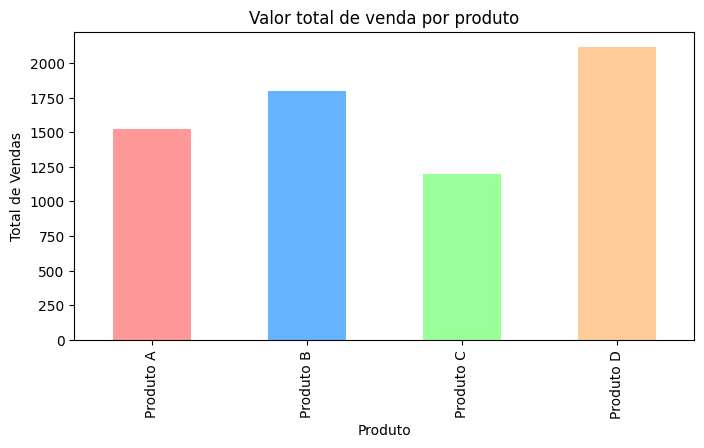

In [11]:
# Total de vendas por produto
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(8, 4))
total_sales_by_product.plot(kind='bar', x='Produto', y='Total de Vendas', legend=False, color=colors)
plt.title('Valor total de venda por produto')
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.show()

#### Análise de vendas por produto

O gráfico permite uma comparação rápida e clara entre os produtos.

Fica evidente que o Produto D é o mais vendido, enquanto o Produto C é o menos vendido.

Text(0, 0.5, 'Quantidade Vendida')

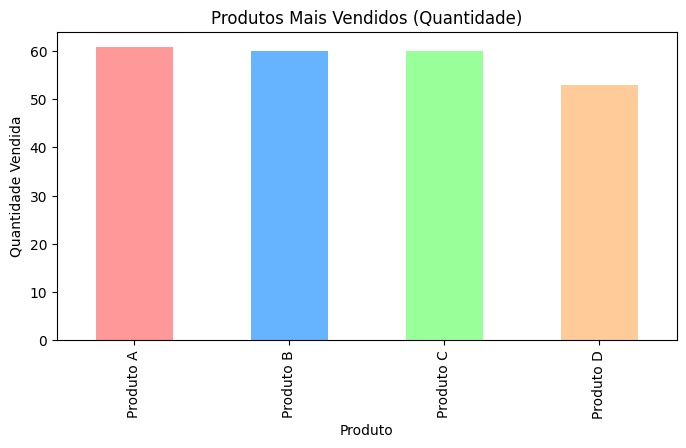

In [12]:
plt.figure(figsize=(8, 4))
most_sold_products.plot(kind='bar', x='Produto', y='Total de Vendas', legend=False, color=colors)
plt.title('Produtos Mais Vendidos (Quantidade)')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')

#### Total de Vendas vs. Quantidade Vendida:

- O primeiro gráfico de barras mostra o total de vendas em termos monetários, enquanto o segundo gráfico mostra a quantidade de unidades vendidas.

- Produto D, que tem o maior total de vendas no primeiro gráfico (~2100), é o que tem a menor quantidade de unidades vendidas no segundo gráfico (50 unidades). Isso sugere que o Produto D tem um preço unitário mais alto.

- Produto A, que tem uma quantidade alta de vendas (60 unidades), mas não é o maior em termos de valor total de vendas, indica que tem um preço unitário menor comparado ao Produto D.

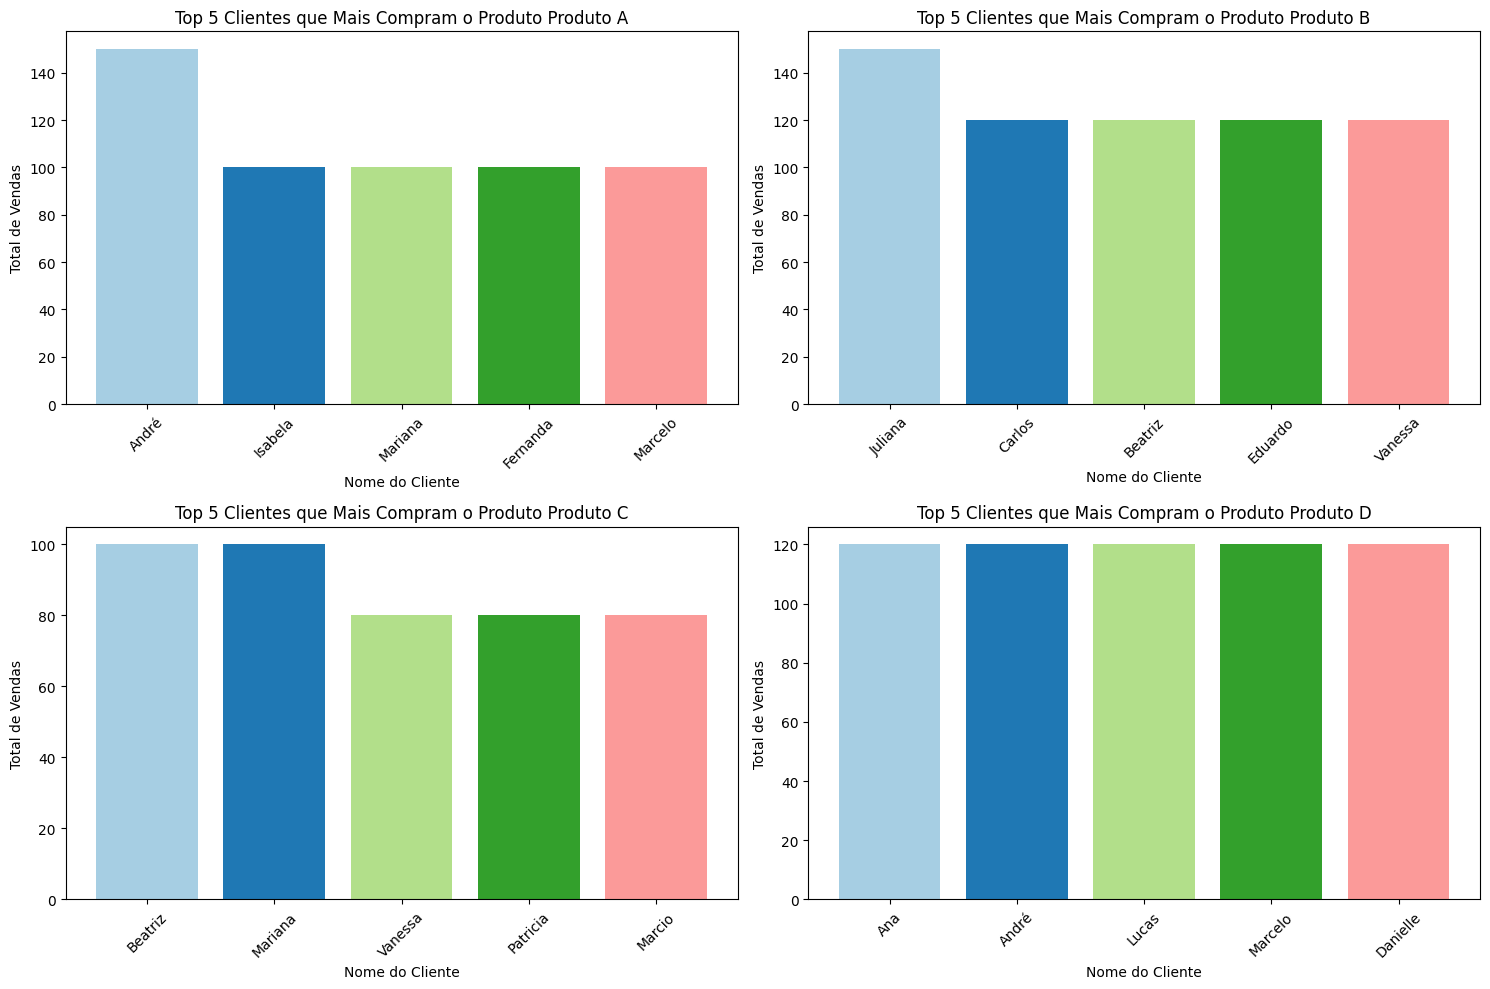

In [13]:
# Agrupar os dados por produto e cliente, somando as vendas
warnings.simplefilter("ignore")
grouped_sales = merged_df.groupby(['product_name', 'cliente_id'])['total_sales'].sum().reset_index()

# Obter os top 3 clientes para cada produto
top_customers_per_product = grouped_sales.groupby('product_name').apply(lambda x: x.nlargest(5, 'total_sales')).reset_index(drop=True)

# Juntar com os dados de clientes para obter os nomes
top_customers_per_product = top_customers_per_product.merge(customer_data, left_on='cliente_id', right_on='cliente_id')


unique_products = top_customers_per_product['product_name'].unique()
num_products = len(unique_products)

# Configurar a grid 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Plotar os gráficos
for i, product_name in enumerate(unique_products):
    warnings.simplefilter("ignore")
    if i >= 4:  # Limitar o número de produtos aos 4 primeiros para caber no grid 2x2
        break
    product_sales = top_customers_per_product[top_customers_per_product['product_name'] == product_name]
    ax = axes[i]
    ax.bar(product_sales['nome'], product_sales['total_sales'], color=plt.cm.Paired(range(5)))
    ax.set_title(f'Top 5 Clientes que Mais Compram o Produto {product_name}')
    ax.set_xlabel('Nome do Cliente')
    ax.set_ylabel('Total de Vendas')
    ax.set_xticklabels(product_sales['nome'], rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

A predominância de compradoras mulheres no Produco C entre os principais clientes é uma informação valiosa que pode guiar diversas estratégias de marketing, desenvolvimento de produtos, promoções e parcerias. Ao adaptar suas estratégias para atender melhor esse público, a empresa pode melhorar a satisfação do cliente, aumentar as vendas e fortalecer a lealdade à marca.

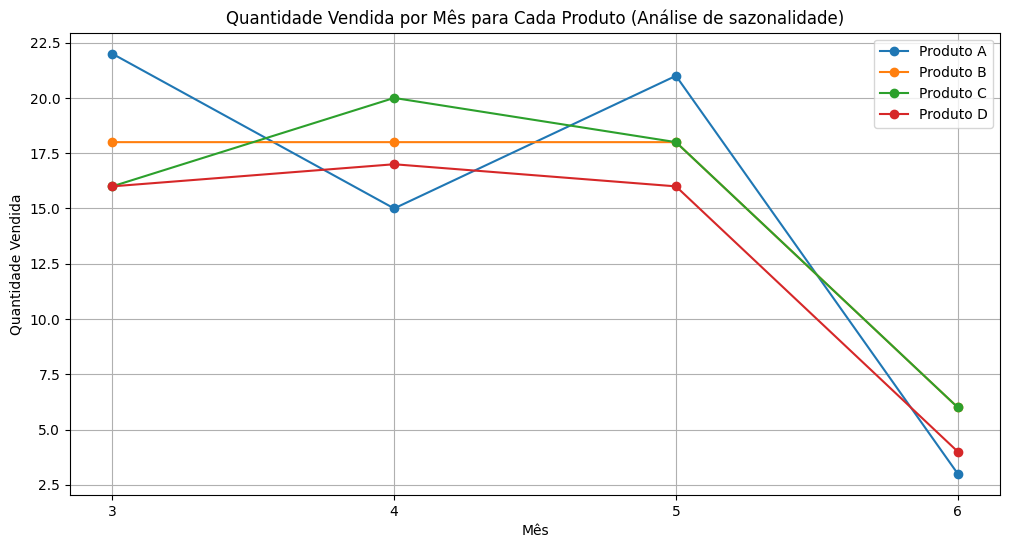

In [14]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Adicionar colunas de ano e mês
sales_data['year'] = sales_data['order_date'].dt.year
sales_data['month'] = sales_data['order_date'].dt.month

# Agrupar por ano, mês e produto para obter a quantidade vendida em cada mês para cada produto
monthly_sales = sales_data.groupby(['year', 'month', 'product_name'])['quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))

for product in monthly_sales['product_name'].unique():
    product_data = monthly_sales[monthly_sales['product_name'] == product]
    plt.plot(product_data['month'], product_data['quantity'], marker='o', label=product)

plt.title('Quantidade Vendida por Mês para Cada Produto (Análise de sazonalidade)')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')
plt.xticks(monthly_sales['month'].unique())
plt.legend()
plt.grid(True)
plt.show()

### Sazonalidade das vendas

A partir do gráfico que mostra a quantidade vendida por mês para cada produto, podemos concluir o seguinte:

#### Produto A:

Apresenta um pico de vendas em março (22 unidades).
Há uma ligeira queda em abril (20 unidades), seguida de um aumento em maio (21 unidades).
Em junho, há uma queda acentuada nas vendas, caindo para 3 unidades.
#### Produto B:

As vendas permanecem constantes em março (18 unidades) e abril (18 unidades).
Em maio, as vendas mantêm-se estáveis (18 unidades).
Em junho, há uma diminuição nas vendas para 6 unidades.
#### Produto C:

As vendas começam em março com 16 unidades, aumentam para 20 unidades em abril.
Em maio, as vendas caem novamente para 18 unidades.
Em junho, há uma queda acentuada para 6 unidades.

#### Produto D:

- As vendas começam em março com 16 unidades, aumentando ligeiramente para 17 unidades em abril.
Em maio, as vendas mantêm-se constantes com 16 unidades.
Em junho, há uma diminuição nas vendas para 4 unidades.
Conclusões Gerais:
Padrão de Vendas Decrescente em Junho:

- Todos os produtos apresentam uma queda acentuada nas vendas em junho. Isso pode indicar um padrão sazonal ou a influência de fatores externos (por exemplo, mudanças econômicas, feriados, férias escolares, etc.) que impactam negativamente as vendas neste mês.
Estabilidade e Variabilidade:

- O Produto B mostra a maior estabilidade nas vendas entre março e maio, enquanto os outros produtos apresentam mais variabilidade nas vendas ao longo dos meses.
Produto A tem as vendas mais voláteis, com um pico em março, uma leve queda em abril, um aumento em maio, e uma grande queda em junho.
Ações Estratégicas:

- Investigação: Seria prudente investigar os motivos por trás da queda nas vendas em junho para ajustar estratégias de marketing ou promoções e mitigar esse impacto negativo.
Promoções: Produtos que apresentam queda de vendas acentuada poderiam se beneficiar de promoções específicas durante os meses de baixa demanda.

- Planejamento de Estoque: Ajustar o planejamento de estoque com base nesses padrões de vendas para evitar excesso ou falta de produtos.

### Insercao dos dados no banco de dados (SQLite3)

In [15]:
import sqlite3
import pandas as pd

def insert_dataframe_to_sqlite(db_filename, dataframe, table_name):
    """
    Insere um DataFrame pandas em uma tabela do banco de dados SQLite.

    Parameters:
    db_filename (str): O caminho para o arquivo do banco de dados SQLite.
    dataframe (pd.DataFrame): O DataFrame pandas a ser inserido.
    table_name (str): O nome da tabela no banco de dados onde os dados serão inseridos.
    """
    try:
        # Estabelecer a conexão com o banco de dados
        conn = sqlite3.connect(db_filename)

        # Inserir o DataFrame na tabela especificada
        dataframe.to_sql(table_name, conn, if_exists='replace', index=False)

        # Fechar a conexão
        conn.close()
        print(f"DataFrame inserido na tabela '{table_name}' com sucesso.")
        
    except sqlite3.Error as e:
        print(f"Erro ao conectar ao banco de dados: {e}")

# Exemplo de uso da função
db_filename = 'sqlite3/rox-test'
insert_dataframe_to_sqlite(db_filename, merged_df, 'CustomerSalesData')


DataFrame inserido na tabela 'CustomerSalesData' com sucesso.


### Consultando no Banco de dados

In [16]:
import sqlite3
import pandas as pd

def execute_query(db_filename, query):
    """
    Executa uma consulta SQL em um banco de dados SQLite e retorna os resultados como um DataFrame pandas.

    Parameters:
    db_filename (str): O caminho para o arquivo do banco de dados SQLite.
    query (str): A consulta SQL a ser executada.

    Returns:
    pd.DataFrame: Os resultados da consulta como um DataFrame pandas.
    """
    try:
        # Estabelecer a conexão com o banco de dados
        conn = sqlite3.connect(db_filename)

        # Criar um cursor
        cursor = conn.cursor()

        # Executar a consulta
        cursor.execute(query)

        # Recuperar todos os resultados
        rows = cursor.fetchall()

        # Converter os resultados em um DataFrame pandas
        df_result = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])

        # Fechar o cursor e a conexão
        cursor.close()
        conn.close()

        return df_result

    except sqlite3.Error as e:
        print(f"Erro ao conectar ao banco de dados: {e}")
        return None


Qual é o valor total de vendas de todos os produtos no mês de maio?

In [17]:
db_filename = 'sqlite3/rox-test'
query = """
    SELECT product_name, 
           SUM(quantity * unit_price) AS total_sales
    FROM CustomerSalesData
    WHERE strftime('%m', order_date) = '05'
    GROUP BY product_name
    """
total_sales_may = execute_query(db_filename, query)

# Exibir os resultados
print(total_sales_may)

  product_name  total_sales
0    Produto A          525
1    Produto B          540
2    Produto C          360
3    Produto D          640


Quais são os 3 clientes com o maior volume de compras?

In [18]:
query = f"""
    SELECT nome, 
           SUM(quantity * unit_price) AS total_spent
    FROM CustomerSalesData
    GROUP BY cliente_id
    ORDER BY total_spent DESC
    LIMIT 3
    """
    
top_n_customers = execute_query(db_filename, query)
print(top_n_customers)

      nome  total_spent
0    André          270
1  Jessica          250
2  Juliana          230
